# Unit 5 - Financial Planning

In [85]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation



%matplotlib inline

In [86]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [87]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [88]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [89]:
# Fetch current BTC price
btc_request = requests.get(btc_url).json()
btc_price = btc_request['data']['1']['quotes']['USD']['price']


# Fetch current ETH price
eth_request = requests.get(eth_url).json()
eth_price = eth_request['data']['1027']['quotes']['USD']['price']


# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")

The current value of your 1.2 BTC is $24,748.80
The current value of your 5.3 ETH is $8,432.35


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [90]:
# Set current amount of shares
my_agg = 200
my_spy = 50
#read-me directions call for these share values

In [91]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [92]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    limit= 1000
).df

# Preview DataFrame
df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-07-14 04:00:00+00:00,118.58,118.74,118.58,118.67,3986756,14580,118.667216,AGG
2020-07-15 04:00:00+00:00,118.50,118.70,118.50,118.68,3403571,12376,118.635501,AGG
2020-07-16 04:00:00+00:00,118.83,118.89,118.74,118.76,3526894,11797,118.825390,AGG
2020-07-17 04:00:00+00:00,118.94,118.99,118.77,118.88,2549106,11425,118.832256,AGG
2020-07-20 04:00:00+00:00,119.03,119.06,118.91,119.01,3989211,13068,118.971408,AGG


In [93]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio[df_portfolio['symbol']=='AGG'].loc[today]['close']
spy_close_price = df_portfolio[df_portfolio['symbol']=='SPY'].loc[today]['close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.67
Current SPY closing price: $318.93


In [94]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

The current value of your 50 SPY shares is $15,946.50
The current value of your 200 AGG shares is $23,734.00


### Savings Health Analysis

In [95]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
df_savings = pd.DataFrame.from_dict({'crypto': [my_btc_value + my_eth_value],'shares': [my_agg_value + my_spy_value]}, orient = 'index', columns= ['amounts'])


# Display savings DataFrame
display(df_savings)

,amounts
crypto,33181.153
shares,39680.500


<AxesSubplot:ylabel='amounts'>

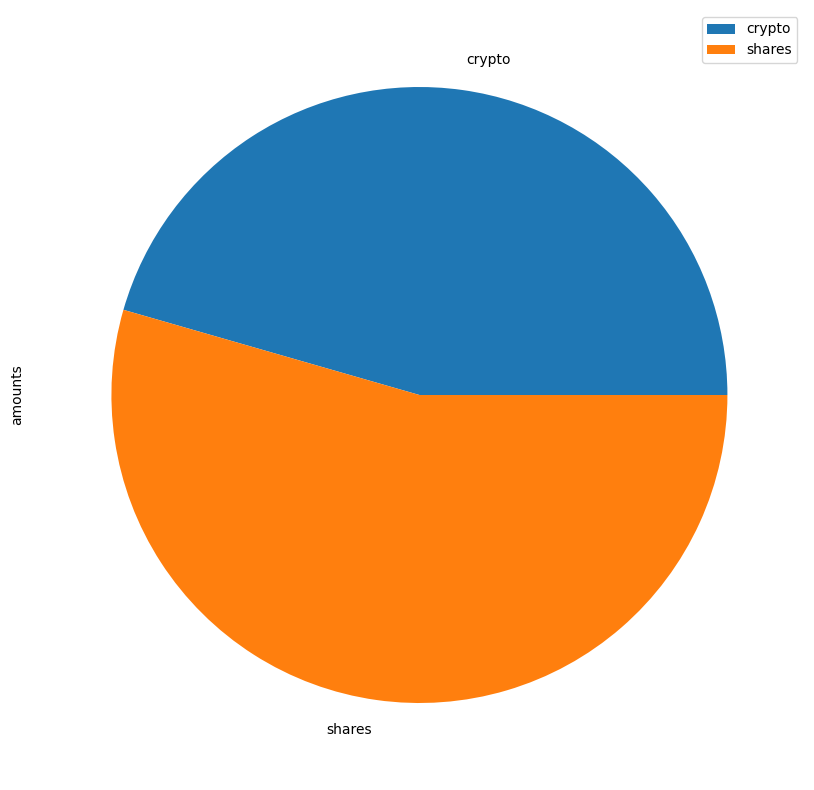

In [96]:
# Plot savings pie chart
df_savings.plot(y='amounts' , kind = 'pie', figsize=(20,10))

In [97]:
# Set ideal emergency fund


emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(df_savings['amounts'])


# Validate saving health

if total_savings > emergency_fund:
    print("congrats! your savings are higher than your emergency fund!")

elif total_savings == emergency_fund:
    print("congrats, on reaching your goal!")
else:
    distance_away = emergency_fund-total_savings
    print(f" you need to save ${distance_away:0,.2f} to reach your savings goal")





congrats! your savings are higher than your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [98]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [99]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)


df_stock_data  = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end= end_date
).df
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)

df_stock_data_reformat = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_stock_data_reformat.head()


SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967

In [100]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims =500
num_years = 30

MC_stock = MCSimulation(
    portfolio_data = df_stock_data_reformat,
    weights= [.60 ,.40],
    num_simulation = num_sims,
    num_trading_days = 252*num_years
)

In [101]:
# Printing the simulation input data
MC_stock.portfolio_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.008707  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005574  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000195  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                             \
                               high       low    close   volume trade_count   
timestamp                                                                     
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.605  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.810  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.860  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.140  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.970  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001853  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [102]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\joseo\Documents\UofM_FinTech_BootCamp\Module-5-APIs\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994640,1.001713,0.997726,0.997690,1.007668,0.999991,1.003336,0.997170,1.009963,1.003463,...,0.999546,1.001711,0.991576,0.996419,1.009673,1.004396,0.995068,0.997195,1.007136,0.994482
2,0.989851,0.989354,0.995184,0.995834,1.006307,1.003291,1.011785,1.003825,1.018677,1.006190,...,1.004741,1.009914,0.987116,0.998812,1.014655,1.012367,0.996570,0.996950,1.006580,1.009549
3,0.984221,0.988015,0.993219,0.996493,1.004868,1.008061,1.011174,1.019305,1.019121,1.001869,...,1.011632,1.022938,0.983985,1.000426,1.013783,1.022812,0.990240,0.996327,1.006544,1.003504
4,0.971980,0.991583,0.988030,1.000239,1.004085,1.002011,1.011497,1.026616,1.030349,1.008355,...,1.006837,1.012905,0.981814,1.000229,1.013214,1.019914,0.982198,1.003161,0.998382,0.992395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,26.954529,25.068308,36.067934,7.050497,9.385784,6.791088,5.043806,12.553453,31.819209,30.679788,...,11.803351,11.792384,25.945802,11.756590,42.088831,15.741584,11.490182,27.367538,10.033822,13.985424
7557,27.047600,25.258482,36.030871,7.068787,9.354101,6.757181,5.040852,12.559705,32.036933,30.910424,...,11.878177,11.762025,26.168453,11.846529,41.688293,15.739739,11.506653,27.472039,10.043557,13.956661
7558,27.102695,24.964455,36.156897,7.094255,9.365332,6.744857,5.037011,12.492484,32.038560,30.988197,...,11.831698,11.776141,26.285807,11.751522,41.883917,16.065451,11.430390,27.299950,10.071326,13.909353
7559,26.851644,24.918044,36.228440,7.035014,9.357294,6.781661,5.003174,12.454089,31.768827,31.360655,...,11.659473,11.697578,26.153811,11.794933,42.012524,16.039324,11.519555,27.362240,9.923475,14.059601


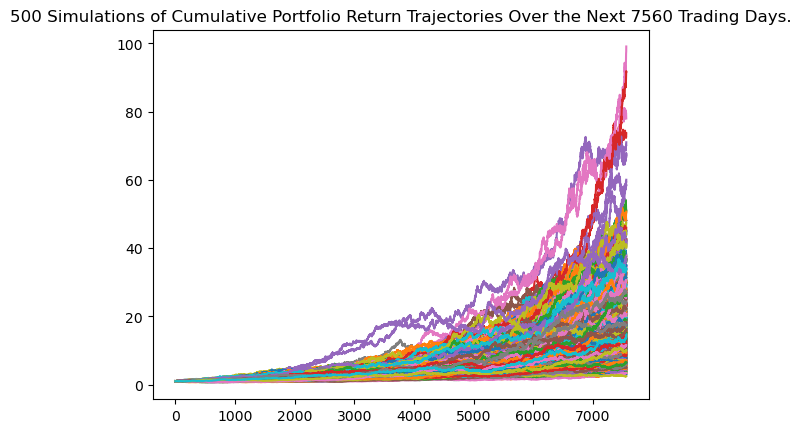

In [103]:
# Plot simulation outcomes
line_plot = MC_stock.plot_simulation()
#line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

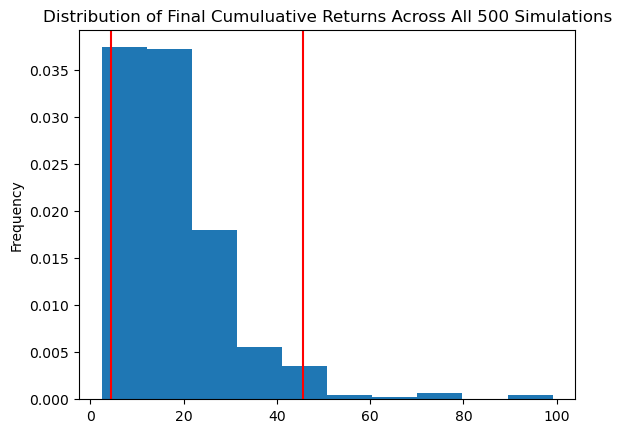

In [104]:
# Plot probability distribution and confidence intervals
hist_plot= MC_stock.plot_distribution()

### Retirement Analysis

In [105]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_stock.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             17.957505
std              12.169103
min               2.455377
25%              10.184107
50%              14.968256
75%              22.977980
max              99.122590
95% CI Lower      4.480554
95% CI Upper     45.597316
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [106]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89,611.08 and $911,946.32


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [107]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = tbl[8] * initial_investment
ci_upper = tbl[9] * initial_investment


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $134,416.61 and $1,367,919.47


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [108]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims =500
num_years = 5

five_year_mc_stock = MCSimulation(
    portfolio_data = df_stock_data_reformat,
    weights= [.90 ,.1],
    num_simulation = num_sims,
    num_trading_days = 252*num_years
)

In [109]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
five_year_mc_stock.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\joseo\Documents\UofM_FinTech_BootCamp\Module-5-APIs\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992454,1.007348,1.009322,1.004531,1.013108,1.008106,1.010805,1.003983,1.005101,0.995818,...,0.977564,1.008703,1.016414,1.001963,1.005489,1.010292,0.997290,0.999076,0.996164,1.017041
2,0.995903,0.995689,1.014056,1.007494,1.010889,0.998391,1.031270,1.006471,1.006867,0.997882,...,1.004817,0.998000,1.018110,1.001960,1.013238,1.014244,1.024549,0.996905,0.999076,1.021711
3,1.016281,0.990792,1.032090,1.025501,1.006913,0.981463,1.018091,1.007673,1.005377,1.004531,...,0.978856,0.994611,1.036657,0.977471,1.002889,1.020565,1.035317,0.986854,0.983886,1.022604
4,1.002965,0.991233,1.046182,1.032213,1.000160,0.980955,1.039340,1.019701,1.003397,0.995479,...,0.969571,0.990059,1.038813,0.981431,1.008788,1.018780,1.042640,0.992878,1.009220,1.039657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.718611,1.838510,2.636972,2.524221,2.213351,1.563037,2.214751,2.117638,0.678809,1.840487,...,2.284702,1.570084,1.796116,2.085263,2.802332,3.232374,2.825320,3.593745,2.309007,2.746326
1257,1.730329,1.844915,2.643701,2.557308,2.202354,1.539232,2.213213,2.094289,0.681143,1.826147,...,2.294555,1.567278,1.801545,2.085033,2.803109,3.275305,2.796850,3.574349,2.349212,2.744081
1258,1.760744,1.829607,2.620165,2.541547,2.228869,1.532263,2.229231,2.099023,0.691307,1.831848,...,2.321133,1.568040,1.815089,2.104808,2.796718,3.257495,2.802372,3.590072,2.356946,2.741076
1259,1.797799,1.815672,2.629190,2.497862,2.238228,1.522355,2.255308,2.060222,0.697847,1.813005,...,2.341535,1.603824,1.806178,2.120072,2.823178,3.252221,2.840900,3.620492,2.355391,2.732166


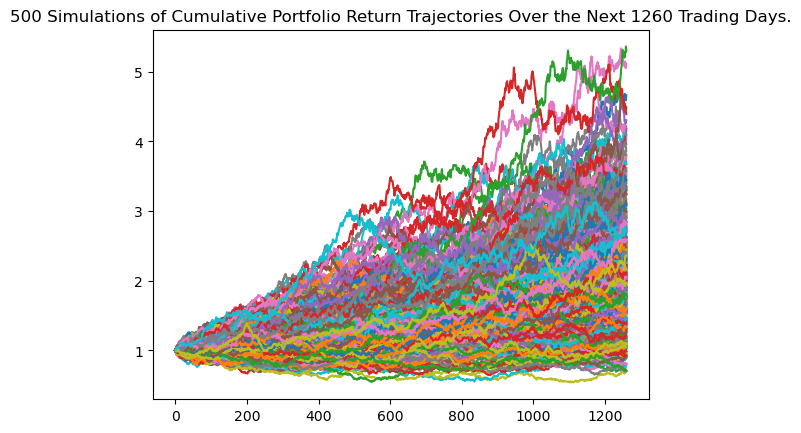

In [110]:
# Plot simulation outcomes
five_year_plot = five_year_mc_stock.plot_simulation()


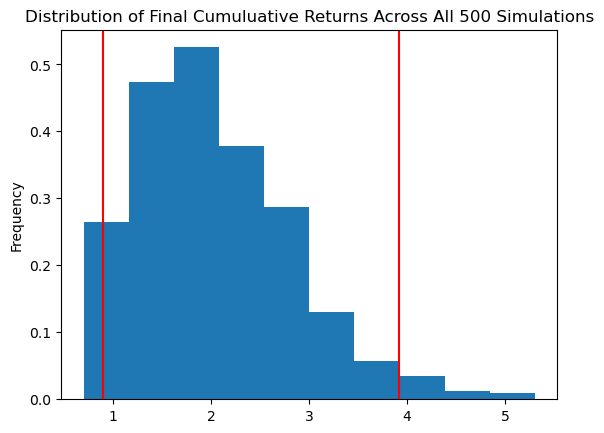

In [111]:
# Plot probability distribution and confidence intervals
five_year_hist_plot = five_year_mc_stock.plot_distribution()

In [112]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_tbl = five_year_mc_stock.summarize_cumulative_return()

# Print summary statistics
print(five_year_tbl)

count           500.000000
mean              2.044492
std               0.790005
min               0.699859
25%               1.455940
50%               1.919996
75%               2.515077
max               5.305139
95% CI Lower      0.899277
95% CI Upper      3.918964
Name: 1260, dtype: float64


In [113]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = five_year_tbl[8] * initial_investment
ci_upper_five = five_year_tbl[9] * initial_investment


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:0,.0f} and ${ci_upper_five:0,.0f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53,957 and $235,138


### Ten Years Retirement Option

In [114]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims =500
num_years = 10

ten_year_mc_stock = MCSimulation(
    portfolio_data = df_stock_data_reformat,
    weights= [.80 ,.20],
    num_simulation = num_sims,
    num_trading_days = 252*num_years
)

In [115]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_mc_stock.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\joseo\Documents\UofM_FinTech_BootCamp\Module-5-APIs\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013475,1.000555,1.006792,0.999392,1.003275,1.001116,1.010875,0.994479,0.992418,0.991513,...,1.008682,1.016416,0.991129,1.004804,1.005914,1.003548,1.002562,1.015280,1.000758,1.009608
2,1.011745,0.993632,1.008402,1.003227,1.019054,1.009167,0.997629,0.994081,0.987725,0.997149,...,1.014367,1.010988,0.983127,1.015391,1.013159,1.015002,1.017716,1.008987,1.000226,0.995972
3,1.024668,0.985352,1.007636,1.006609,1.022655,1.017894,1.012338,0.976998,0.975982,0.979678,...,0.998314,1.007047,0.993279,1.013083,1.007732,1.009957,1.010533,1.008950,1.002593,0.995091
4,1.016691,1.009688,1.007983,1.018804,1.027265,1.018915,1.003364,0.973890,0.982534,0.979499,...,0.992218,1.008153,0.997671,1.017656,1.010145,1.027224,1.019291,1.004673,1.003202,1.000286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.351716,7.778471,2.856706,2.404637,1.793417,4.547798,4.756448,2.800348,4.524513,4.033246,...,3.377096,3.417175,1.718823,3.111731,4.993046,2.388982,1.197861,6.272577,8.251245,1.883582
2517,2.357161,7.757720,2.886450,2.437173,1.801820,4.547552,4.759194,2.825211,4.560795,4.005832,...,3.329549,3.378523,1.718613,3.087694,5.010564,2.390887,1.183297,6.225302,8.305340,1.896128
2518,2.314715,7.702232,2.891285,2.435978,1.806280,4.585122,4.723130,2.812122,4.562985,4.049362,...,3.366884,3.331574,1.725929,3.086672,5.076053,2.417255,1.181925,6.189036,8.330041,1.905032
2519,2.310992,7.632079,2.879677,2.442623,1.801332,4.631060,4.763907,2.836028,4.537688,4.082450,...,3.349301,3.302753,1.733944,3.101045,5.061597,2.401230,1.176955,6.188733,8.265947,1.898939


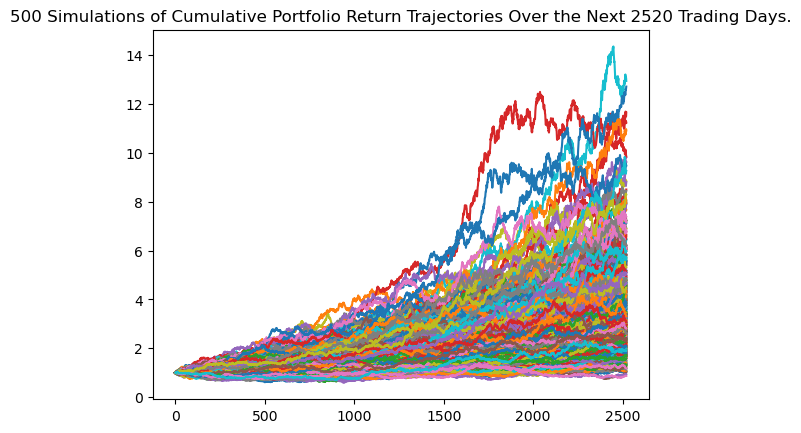

In [116]:
# Plot simulation outcomes
ten_year_plot = ten_year_mc_stock.plot_simulation()


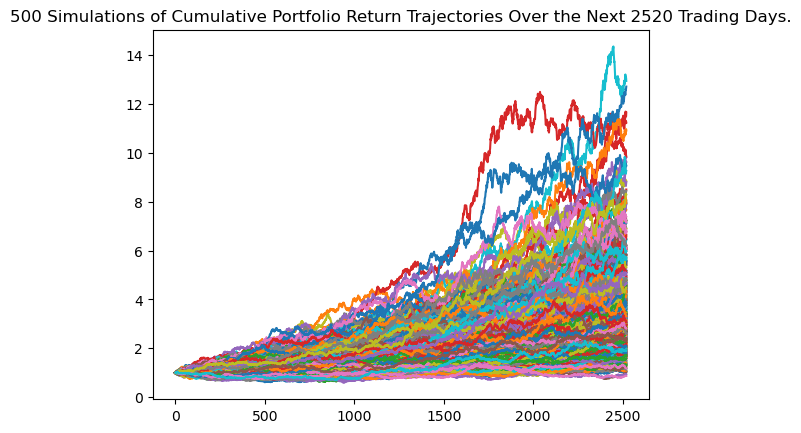

In [117]:
# Plot probability distribution and confidence intervals
ten_year_hist_plot = ten_year_mc_stock.plot_simulation()

In [118]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_tbl = ten_year_mc_stock.summarize_cumulative_return()

# Print summary statistics
print(ten_year_tbl)

count           500.000000
mean              3.575148
std               1.829748
min               0.866221
25%               2.375301
50%               3.050604
75%               4.433818
max              12.948030
95% CI Lower      1.310288
95% CI Upper      8.472815
Name: 2520, dtype: float64


In [119]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = ten_year_tbl[8] * initial_investment
ci_upper_ten = ten_year_tbl[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:0,.0f} and ${ci_upper_ten:0,.0f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $78,617 and $508,369


## Will weighting the portfolio more heavily toward stock allow the credit union members to retire after only 10 years?

No, the return for a heavily weighted stock portfolio with a higher initial investment only returns ~$500K in the upper limit. This is far below the 30-year forecast of $1.3M